In [8]:
import pandas as pd
LKS1=pd.read_csv('2016Q1.csv')
LKS2=pd.read_csv('2016Q2.csv')
LKS3=pd.read_csv('2016Q3.csv')
LKS4=pd.read_csv('2016Q4.csv')
LKS5=pd.read_csv('2017Q1.csv')
LKS6=pd.read_csv('2017Q2.csv')
LKS7=pd.read_csv('2017Q3.csv')
LKS8=pd.read_csv('2017Q4.csv')
LKS9=pd.read_csv('2018Q_1.csv')
LKS10=pd.read_csv('2018Q2.csv')
LKS11=pd.read_csv('2018Q3.csv')
LKS12=pd.read_csv('2018Q4.csv')

In [9]:
LKS = pd.concat([LKS1,LKS2,LKS3,LKS4,LKS5,LKS6,LKS7,LKS8,LKS9,LKS10,LKS11,LKS12],sort=True)

In [10]:
new = LKS['지역'].str.split(' ', n = 1, expand = True)  #공백으로 한번만 쪼개기  ex) '대전 광역시' 하면 new[0] = 대전 / new[1] = 광역시
LKS['시도'] = new[0] #시도라는 새로운 변수 만들어줌
LKS['시군구'] = new[1]

In [20]:
date = LKS['측정일시'].astype(str) #측정일시가 숫자로 돼있어서 문자로 바꿈
LKS['날짜'] = date.str.slice(start=0, stop=8).astype(str)
#LKS['연도'] = date.str.slice(start=0, stop=4).astype(str)
#LKS['월'] = date.str.slice(start=4, stop=6).astype(str)
#LKS['일'] = date.str.slice(start=6, stop=8).astype(str)

LKS['시간'] = date.str.slice(start=8, stop=10).astype(str)

In [21]:
LKS['날짜2'] = pd.to_datetime(LKS['날짜'])

In [22]:
LKS['연도']=LKS['날짜2'].dt.year
LKS['월']=LKS['날짜2'].dt.month
LKS['요일']=LKS['날짜2'].dt.weekday

In [ ]:
LKS['주중'] = LKS['요일']

In [57]:
LKS000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421050 entries, 290472 to 849877
Data columns (total 22 columns):
CO       float64
NO2      float64
O3       float64
PM10     float64
PM25     float64
SO2      float64
날짜       object
날짜2      datetime64[ns]
망        object
시간       object
시군구      object
시도       object
연도       int64
요일       int64
월        int64
일        object
주소       object
지역       object
측정소명     object
측정소코드    int64
측정일시     int64
주말여부     object
dtypes: datetime64[ns](1), float64(6), int64(5), object(10)
memory usage: 680.3+ MB


In [24]:
#광역시로 나타내기
LKS000 = LKS[LKS['시도']=='광주']
LKS111 = LKS[LKS['시도']=='대구']
LKS222 = LKS[LKS['시도']=='대전']
LKS333 = LKS[LKS['시도']=='부산']
LKS444 = LKS[LKS['시도']=='서울']
LKS555 = LKS[LKS['시도']=='울산']
LKS666 = LKS[LKS['시도']=='인천']
LKS000 = pd.concat([LKS000,LKS111,LKS222,LKS333,LKS444,LKS555,LKS666],sort=True)

Text(0.5, 1.0, '16~18년도 광역시별 미세먼지')

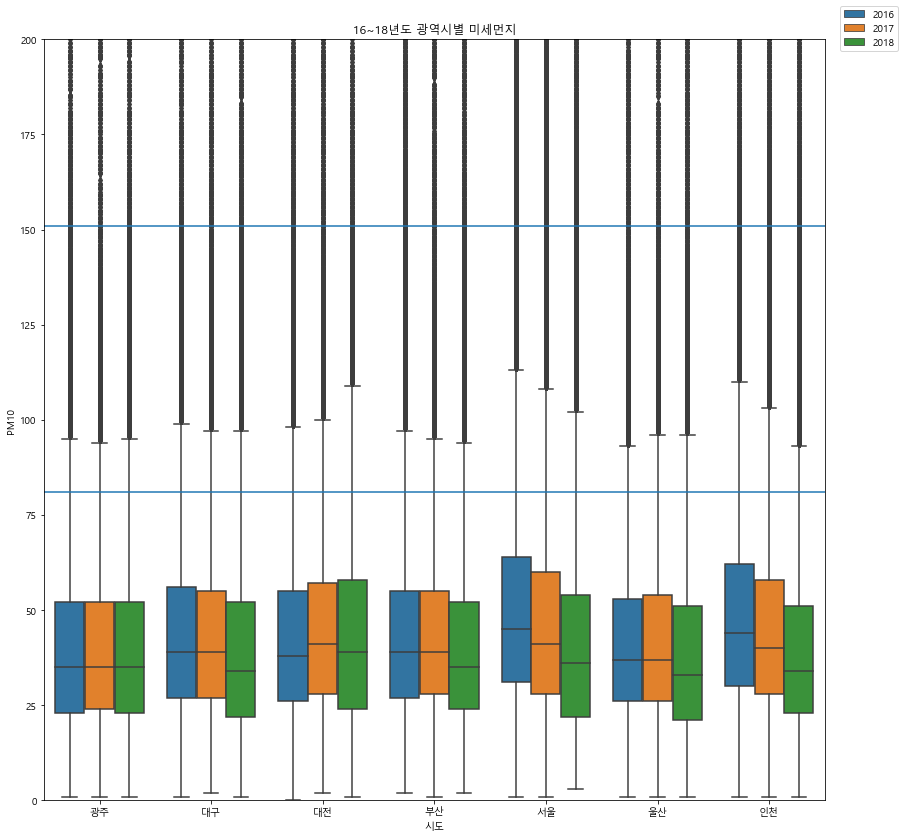

In [45]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='시도',y='PM10',hue='연도',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(151) #일반 미세먼지 기준치 151
plt.axhline(81)
plt.ylim(0,200) #200까지만 자르기
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('16~18년도 광역시별 미세먼지')


Text(0.5, 1.0, '16~18년도 광역시별 초미세먼지')

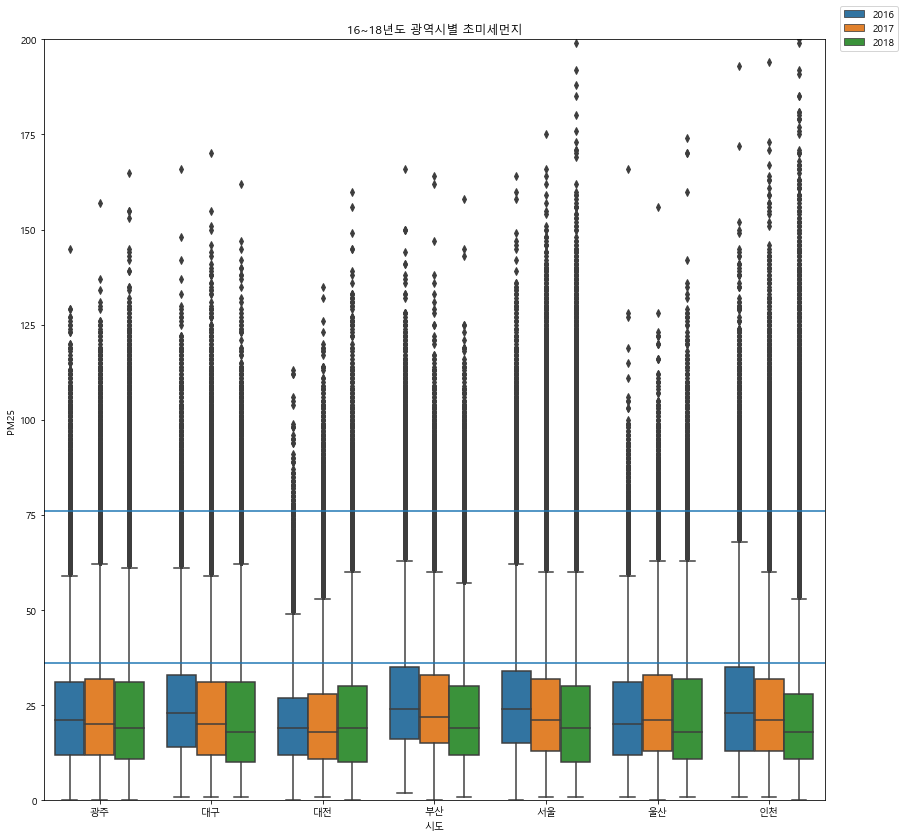

In [46]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='시도',y='PM25',hue='연도',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(76) #일반 미세먼지 기준치 151
plt.axhline(36)
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('16~18년도 광역시별 초미세먼지')

Text(0.5, 1.0, '16~18년도 요일별 미세먼지')

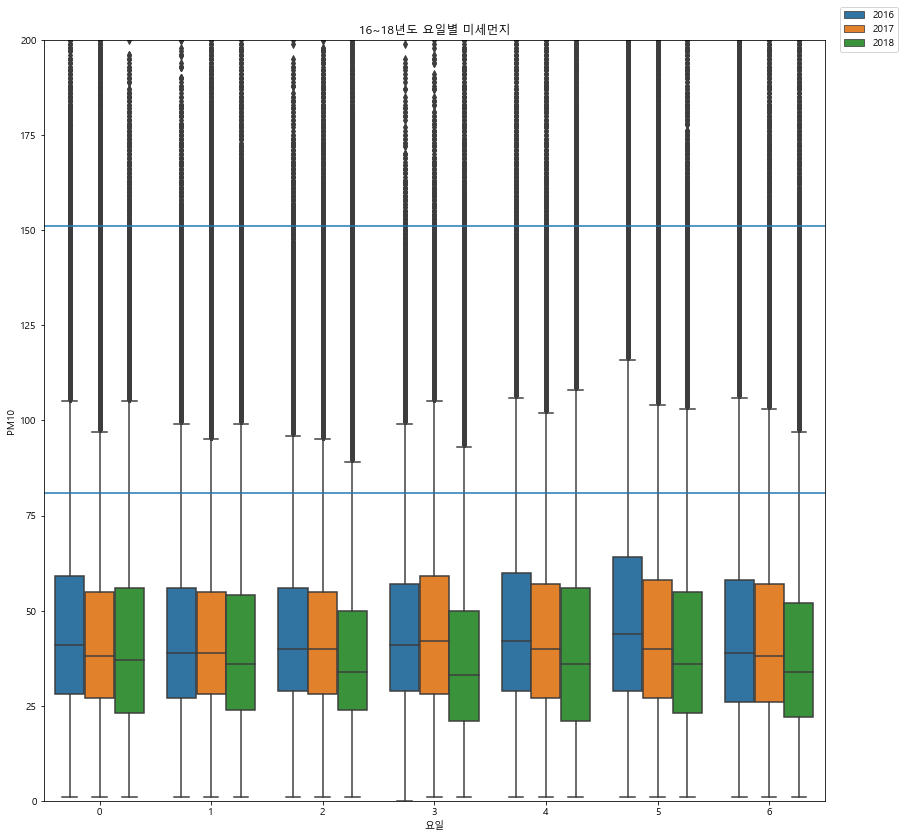

In [47]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='요일',y='PM10',hue='연도',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(151) #일반 미세먼지 기준치 151
plt.axhline(81)
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('16~18년도 요일별 미세먼지')

Text(0.5, 1.0, '16~18년도 요일별 초미세먼지')

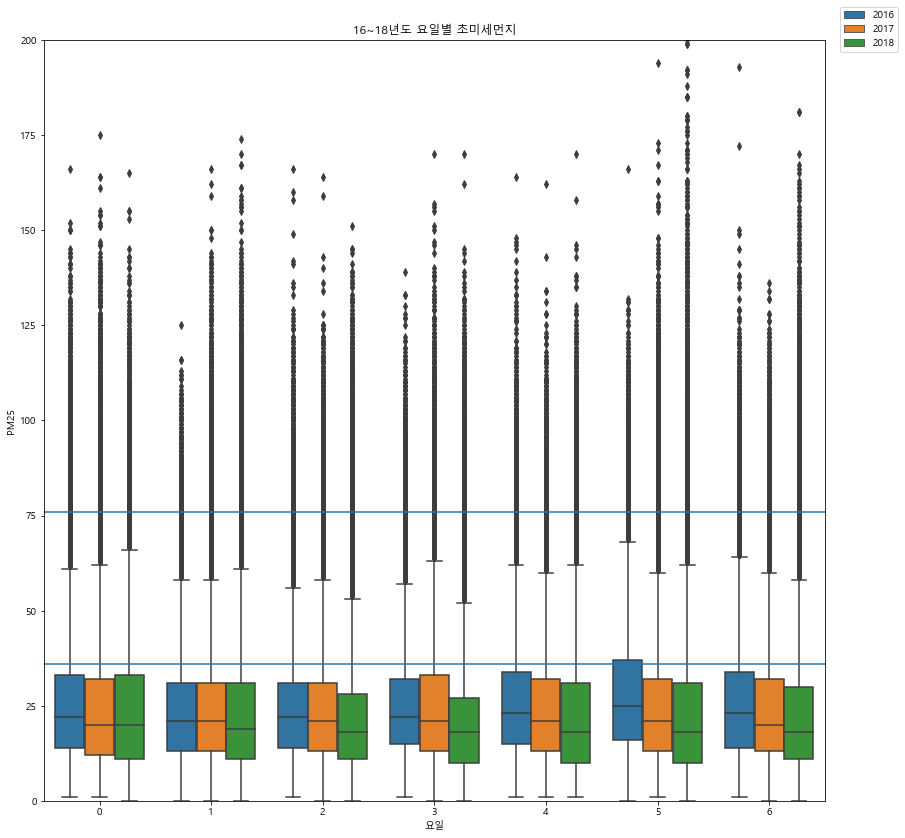

In [48]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='요일',y='PM25',hue='연도',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(76)
plt.axhline(36)#일반 미세먼지 기준치 151
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('16~18년도 요일별 초미세먼지')

In [52]:
import numpy as np
LKS000['주말여부'] = np.where(LKS000['요일']>=5,'주말','평일')

Text(0.5, 1.0, '주말여부 시도별 미세먼지')

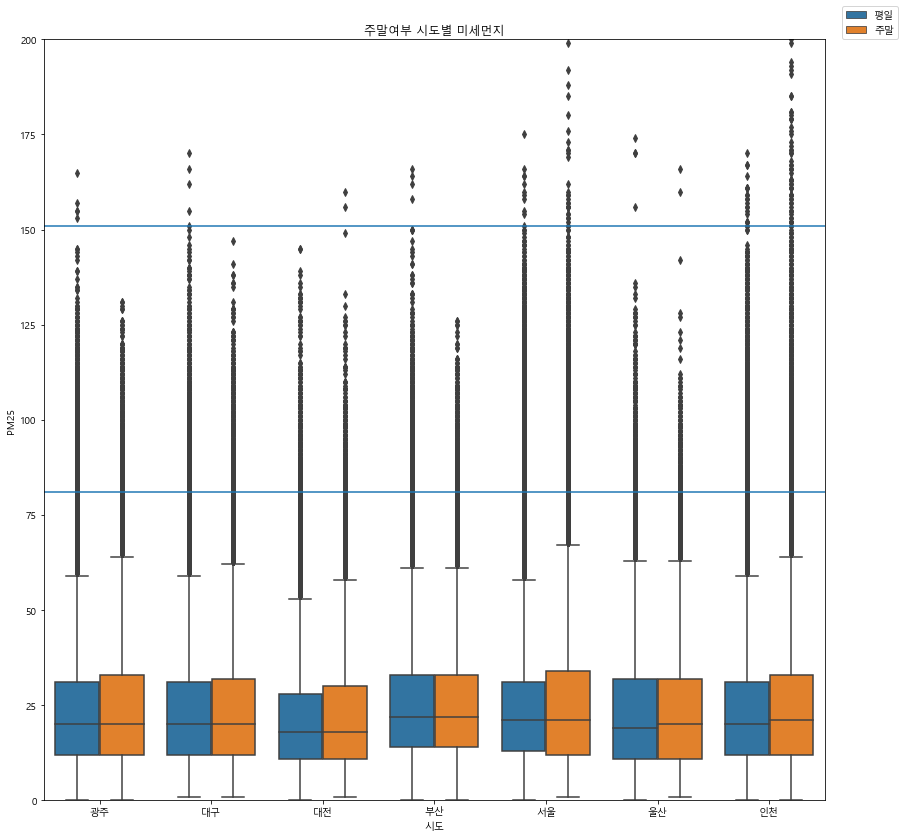

In [58]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='시도',y='PM25',hue='주말여부',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(151)
plt.axhline(81)#일반 미세먼지 기준치 151
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('주말여부 시도별 미세먼지')

Text(0.5, 1.0, '주말여부 시도별 초미세먼지')

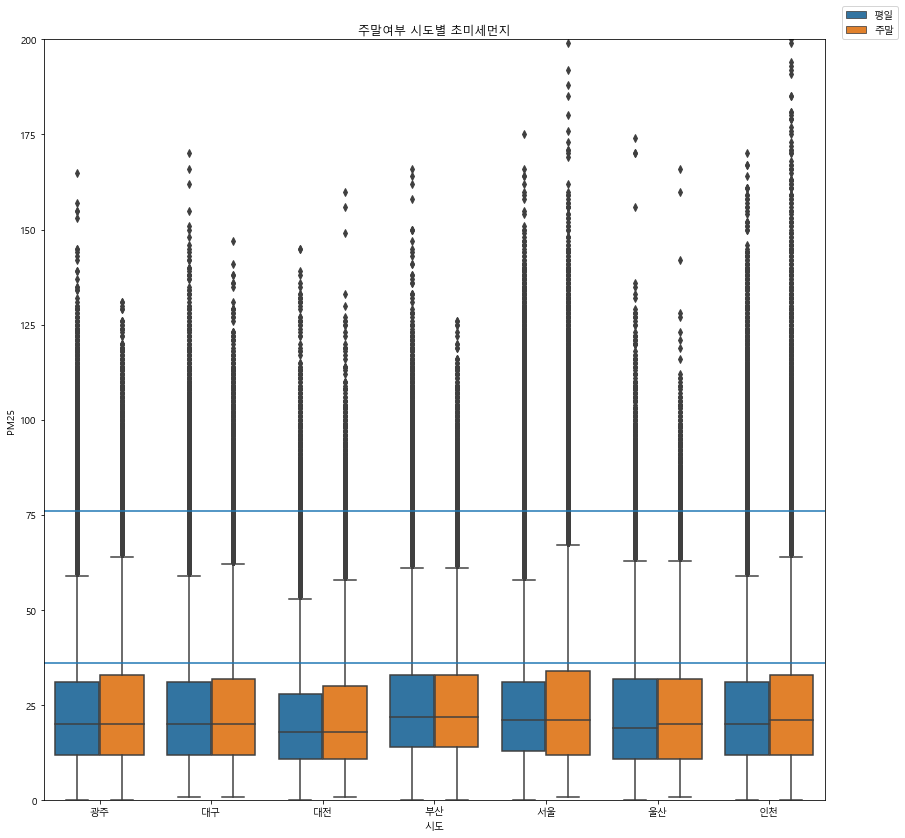

In [59]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='시도',y='PM25',hue='주말여부',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(76)
plt.axhline(36)#일반 미세먼지 기준치 151
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('주말여부 시도별 초미세먼지')

Text(0.5, 1.0, '주말여부 연도별 미세먼지')

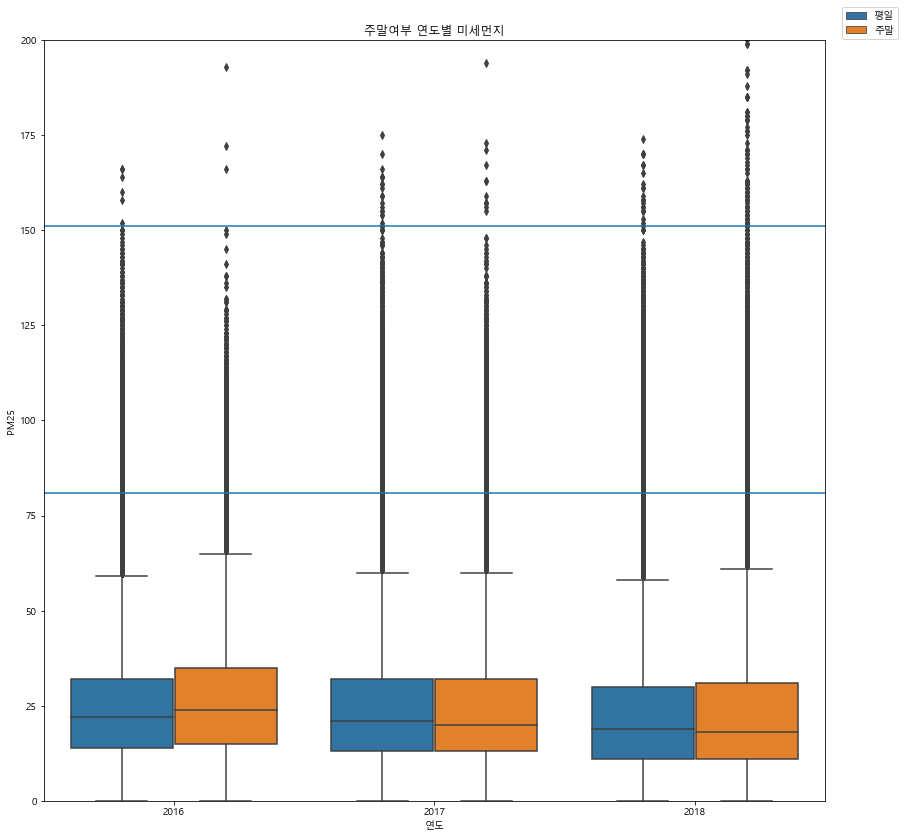

In [60]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='연도',y='PM25',hue='주말여부',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(151)
plt.axhline(81)#일반 미세먼지 기준치 151
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('주말여부 연도별 미세먼지')

Text(0.5, 1.0, '주말여부 연도별 초미세먼지')

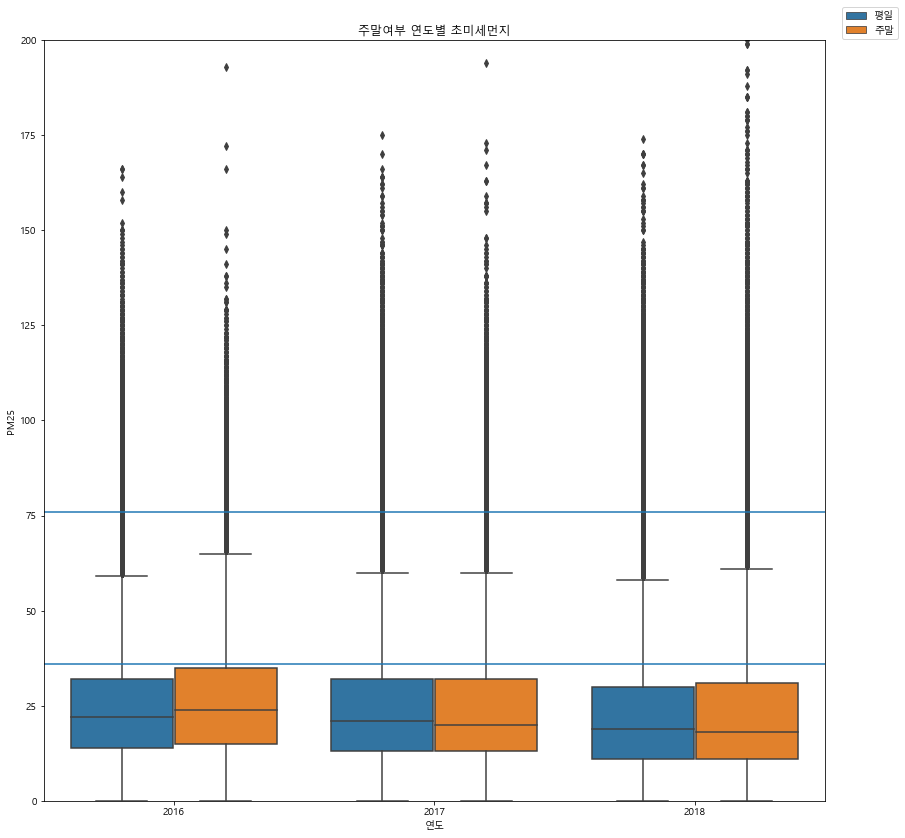

In [61]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,14) #set size of Graph
#######################################################
##mise00 = mise1.groupby(by=['시도','월','일']).max()
##mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax=sns.boxplot(x='연도',y='PM25',hue='주말여부',data=LKS000) #PM10은 그냥 미세먼지 
plt.axhline(76)
plt.axhline(36)#일반 미세먼지 기준치 151
plt.ylim(0,200)
ax.legend(bbox_to_anchor=(1.1,1.05)) # 범례 밖으로 빼는함수
plt.show #위에 쓸데없는 글자 안나옴
plt.title('주말여부 연도별 초미세먼지')